# 1.业务背景

拼多多是国内主流的手机购物APP，成立于2015年9月，用户通过发起和朋友、家人、邻居等的拼团，以更低的价格，拼团购买商品。
拼多多作为新电商开创者,致力于将娱乐社交的元素融入电商运营中,通过“社交+电商”的模式,让更多的用户带着乐趣分享实惠,享受全新的共享式购物体验。
对于各大电商平台，在“双十一”这种大促时间段，优惠券会起到非常大的促销作用。

1.使用Python建立逻辑回归模型

2.预测用户是否会在活动中使用优惠券

3.找到对用户使用优惠券影响较大的因素

# 2.导入数据与初步探索

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pdd=pd.read_csv(r'E:\小灶数据分析课程\拼多多优惠券数据.csv')

In [3]:
#导入中文字体---黑体
plt.rcParams['font.sans-serif']=['simhei']

In [4]:
pdd.info()
#数据共有25317个，初步探索未发现空值，且数据类型没有问题。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marital                     25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [5]:
pdd.head()
#ID在这里没有作用，从age到coupon_used_in_last_month都是特征变量。
#其中，age,coupon_used_in_last6_month，coupon_used_in_last_month都是数值型变量，需要探索是否有异常值，离群值等；
#而job,marital,default,returned,loan都是分类型变量，需要查看是否有空值异常值，以及转换为哑变量等；
#coupon_ind是目标分类变量

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


2.1数值型变量数据处理

In [6]:
#数值型变量概览
pdd.describe()
#1.ID略过，age的最小值18没有问题，但是最大值95岁有点异常，需要进一步探索，age的标准差达到了10，考虑是否需要排除离群值或者进行对数处理或分箱。
#2.coupon_used_in_last6_month也是同样最大值55有点离群，虽然现实中也是正常现象，但是会造成数据偏差，可考虑分箱。
#3.coupon_used_in_last_month75%都是0，最大值15确实不小，但标准差0.76比较稳健，暂时不动。
#4.coupon_ind都是0/1，没有问题。

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


2.1.1 age

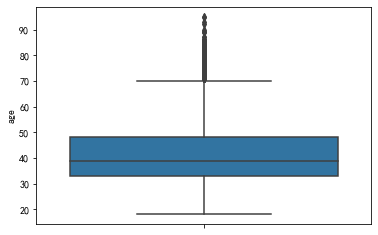

In [7]:
sns.boxplot(y='age',data=pdd);

In [8]:
#计算age的离群值
tmp=pdd['age'].describe()
IQR=tmp['75%']-tmp['25%']
tmp['75%']+ 1.5 * IQR
#超过70.5的为离群值，需要进行筛除

70.5

In [9]:
pdd=pdd[pdd['age']<70]
pdd.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,24993.000000,24993.000000,24993.000000,24993.000000,24993.000000
mean,12607.551754,40.481735,2.781099,0.289201,0.112752
std,7285.396095,9.906800,3.148617,0.763264,0.316295
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6302.000000,32.000000,1.000000,0.000000,0.000000
50%,12595.000000,39.000000,2.000000,0.000000,0.000000
75%,18899.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,69.000000,55.000000,15.000000,1.000000


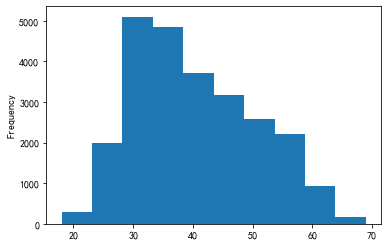

In [10]:
pdd['age'].plot(kind='hist');

In [11]:
bins=[18,30,40,50,70]
labels=['<30','30-40','40-50','>50']
pdd['age']=pd.cut(pdd.age, bins, right=True,labels=labels)
pdd['age'].value_counts(1)
#对年龄组进行分箱，之前尝试对数转换发现年龄都不是整数了，决定分箱操作

30-40    0.397647
40-50    0.252131
>50      0.193621
<30      0.156601
Name: age, dtype: float64

2.1.2 coupon_used_in_last6_month

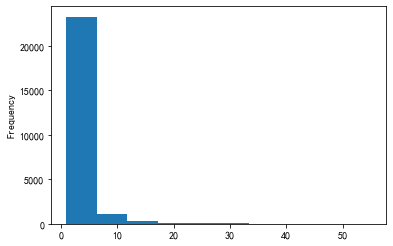

In [12]:
#可视化查看这一变量大概的分布
pdd['coupon_used_in_last6_month'].plot(kind='hist');

In [13]:
#对coupon_used_in_last6_month分箱操作
bins=[0,1,2,55]
labels=['1','2','>=3']
pdd['coupon_last6_month']=pd.cut(pdd.coupon_used_in_last6_month, bins, right=True,labels=labels)
pdd['coupon_last6_month'].value_counts(1)

1      0.386588
>=3    0.336334
2      0.277078
Name: coupon_last6_month, dtype: float64

2.2 分类型变量数据处理

In [14]:
pdd['marital'].value_counts()
#marital有三类，已婚，单身和离婚状态，没有空值，虽然比例差异有点大，但可以使用

married     15003
single       7147
divorced     2843
Name: marital, dtype: int64

In [15]:
pdd['job'].value_counts()
#job一共分为十类管理类和技术员最多，但还有158人职业是未知,占比不大，查看下情况看是否直接删除
pdd.groupby(['coupon_ind'])['job'].value_counts()
pdd['coupon_ind'].value_counts(1)
(2818-18)/(24993-140-18)
#原本使用优惠券的占比0.112752，删除之后占比0.112744，差别不大可以直接删除

0.11274411113348097

In [16]:
#删除job中unknown的部分
pdd=pdd[pdd['job']!='unknown']
pdd['job'].value_counts()

blue-collar      5454
management       5285
technician       4237
admin.           2906
services         2342
retired           992
self-employed     881
entrepreneur      854
unemployed        701
housemaid         650
student           533
Name: job, dtype: int64

In [17]:
#job中职业太多，可进行大类分类，按照工作的自由情况
pdd['job'].replace(['management','technician','admin.','entrepreneur'],'midfree', inplace=True)
pdd['job'].replace(['student','retired','admin.','unemployed','housemaid'],'highfree',inplace=True)
pdd['job'].replace(['services','blue-collar','admin.','self-employed'],'lessfree',inplace=True)
pdd['job'].unique()

array(['midfree', 'lessfree', 'highfree'], dtype=object)

In [18]:
pdd['default'].value_counts()
#default分为有违约和没有，占比差异大但是符合实际情况，可用

no     24388
yes      447
Name: default, dtype: int64

In [19]:
pdd['returned'].value_counts()
#returned有无退货分布很相近，数据很OK

yes    13997
no     10838
Name: returned, dtype: int64

In [20]:
pdd['loan'].value_counts()
#loan是否用信用卡付款占比差异也比较大，但是符合实际，没有空值可以用
#总体分类型变量问题不大，除了job有很少量的未知职业需要进行处理

no     20780
yes     4055
Name: loan, dtype: int64

In [21]:
#将分类型变量转换成哑变量，因为想要保留部分变量，就没用drop_first，直接删除部分变量
pdd = pd.get_dummies(pdd)
pdd.drop(['default_no','default_no','returned_no','loan_no','age_>50','coupon_last6_month_2','coupon_used_in_last6_month'],axis=1,inplace=True)
#将下面几个变量重命名
pdd=pdd.rename(columns={'default_yes':'default','returned_yes':'returned','loan_yes':'loan','coupon_ind':'flag'})
pdd.head(10)

,ID,coupon_used_in_last_month,flag,age_<30,age_30-40,age_40-50,job_highfree,job_lessfree,job_midfree,marital_divorced,marital_married,marital_single,default,returned,loan,coupon_last6_month_1,coupon_last6_month_>=3
0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1,2,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0
2,3,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0
3,4,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0
4,5,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1
5,6,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
6,7,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
7,8,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
8,9,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1
9,10,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1


2.3 目标变量coupon_ind分布

In [22]:
#二分类模型，分析flag 1和0的占比
pdd.flag.value_counts(1)
#虽然使用优惠券的人群较少，但总体超过了5%，也可以使用;可以后期模型优化的时候再做不平衡数据处理

0    0.887256
1    0.112744
Name: flag, dtype: float64

In [23]:
summary=pdd.groupby('flag')
print(summary)
summary.mean()

,ID,coupon_used_in_last_month,age_<30,age_30-40,age_40-50,job_highfree,job_lessfree,job_midfree,marital_divorced,marital_married,marital_single,default,returned,loan,coupon_last6_month_1,coupon_last6_month_>=3
flag,,,,,,,,,,,,,,,,
0,11182.455366,0.259269,0.149263,0.401951,0.258725,0.108736,0.361970,0.529294,0.114409,0.610211,0.275380,0.019151,0.587474,0.171409,0.374541,0.347356
1,23840.157857,0.531786,0.218214,0.373214,0.194643,0.171429,0.250357,0.578214,0.111786,0.516429,0.371786,0.008929,0.375714,0.099286,0.483214,0.246071


# 3. 单变量相关性分析

In [25]:
#相关性分析
pdd.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
ID,0.549588
coupon_used_in_last_month,0.112733
coupon_last6_month_1,0.070575
marital_single,0.067457
job_highfree,0.061966
age_<30,0.059939
job_midfree,0.031020
marital_divorced,-0.002609
age_30-40,-0.018563


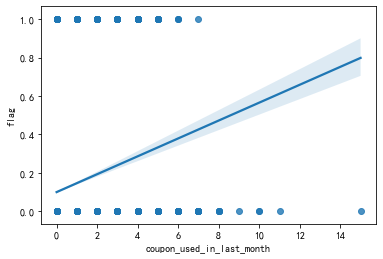

In [50]:
#线性关系可视化
#斜率与相关系数有关
sns.regplot('coupon_used_in_last_month','flag',pdd)

# 4.建立逻辑回归模型

In [27]:
#逻辑回归模型
#设定因变量与自变量， y 是 flag, x 根据刚才的相关分析挑选coupon_used_in_last_month，job_highfree，marital_single，age_<30，coupon_last6_month_1
y=pdd['flag']
x=pdd[['coupon_used_in_last_month','job_highfree','marital_single','age_<30','coupon_last6_month_1']]

In [28]:
#调用sklearn模块，随机抽取训练集与测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [29]:
#调用skearn中逻辑回归模块
from sklearn import linear_model
lr=linear_model.LogisticRegression()

In [30]:
#模型拟合
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#模型的截距与系数
lr.intercept_

array([-2.60991893])

In [32]:
lr.coef_

array([[0.37272897, 0.45605749, 0.29690246, 0.27901727, 0.45797594]])

In [33]:
#模型的评估
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [34]:
print(y_pred_train)

[0 0 0 ... 0 0 0]


In [35]:
#搭建混淆矩阵
import sklearn.metrics as metrics
#搭建训练集混淆矩阵
metrics.confusion_matrix(y_train,y_pred_train)

array([[15410,    14],
       [ 1960,     0]], dtype=int64)

In [36]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.8864473078693051

In [37]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[6605,    6],
       [ 839,    1]], dtype=int64)

In [38]:
metrics.accuracy_score(y_test,y_pred_test)

0.8865924037042008

In [39]:
# 从sklearn.metrics里导入classification_report模块。  分类报告
from sklearn.metrics import classification_report

In [40]:
# 利用classification_report模块获得LogisticRegression其他三个指标的结果。
print(classification_report(y_test, y_pred_test, target_names=['NonUse', 'Use']))
#模型整体来看，使用优惠券的效果很差，召回率为0，准确率只有0.14，需要进行模型优化

              precision    recall  f1-score   support

         Use       0.89      1.00      0.94      6611
      Nonuse       0.14      0.00      0.00       840

    accuracy                           0.89      7451
   macro avg       0.52      0.50      0.47      7451
weighted avg       0.80      0.89      0.83      7451



# 5.模型优化

In [41]:
#源数据中使用优惠券占比仅为0.112744，虽然样本量还可以，这里选择更改权重的方法处理
#利用设置权重来调整不平衡数据
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#逻辑回归平衡权重
lr1= LogisticRegression(random_state=100, class_weight='balanced')

#用新的权重参数进行模型拟合
lr1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#调用sklearn模块，随机抽取训练集与测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [60]:
#模型的截距与系数
lr1.intercept_

array([-0.56870005])

In [61]:
lr1.coef_

array([[0.47676437, 0.41526299, 0.28598465, 0.27975607, 0.43264823]])

In [62]:
#模型的评估
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train1=lr1.predict(x_train)
y_pred_test1=lr1.predict(x_test)
print(y_pred_train1)

[0 0 0 ... 0 0 1]


In [63]:
#搭建混淆矩阵
import sklearn.metrics as metrics
#搭建训练集混淆矩阵
metrics.confusion_matrix(y_train,y_pred_train1)

array([[10896,  4528],
       [  962,   998]], dtype=int64)

In [64]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train1)

0.6841923607915325

In [65]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test1)
metrics.accuracy_score(y_test,y_pred_test1)

0.700711313917595

In [66]:
# 从sklearn.metrics里导入classification_report模块。  分类报告
from sklearn.metrics import classification_report
# 利用classification_report模块获得LogisticRegression其他三个指标的结果。
print(classification_report(y_test, y_pred_test1, target_names=['NonUse', 'Use']))
#模型整体来看，使用优惠券的群体召回率为0.52，有所升高，准确率只有0.19单也有所提高，模型优化

              precision    recall  f1-score   support

         Use       0.92      0.72      0.81      6611
      Nonuse       0.19      0.52      0.28       840

    accuracy                           0.70      7451
   macro avg       0.56      0.62      0.55      7451
weighted avg       0.84      0.70      0.75      7451



# 6.业务解读

In [67]:
#系数解读
import math
print(math.exp(0.47676437))
print(math.exp(0.41526299))
print(math.exp(0.28598465))
print(math.exp(0.27975607))
print(math.exp(0.43264823))

1.6108538338433516
1.5147690574275063
1.3310720231399205
1.3228071006434454
1.5413339302888176
